This US Census dataset contains detailed but anonymized information for approximately 300,000 people.

The archive contains 3 files:   
1) A large training file (csv)
2) Another test file (csv)
3) A metadata file (txt) describing the columns of the two csv files (identical for both)

The goal of this exercise is to model the information contained in the last column (42nd), i.e., whether a person makes more or less than $50,000 per year, from the information contained in the other columns. The exercise here consists of modeling a binary variable.

Work with Python (or R) to carry out the following steps:  
1) Load the train and test files.  

2) Perform an exploratory analysis on the data and create some relevant visualisations.  

3) Clean, preprocess, and engineer features in the training data, with the aim of building a data set that a model will perform well on. 

4) Create a model using these features to predict whether a person earns more or less than $50,000 per year. Here, the idea is for you to test a few different models, and see whether there are any techniques you can apply to improve performance over your first results.  

5) Choose the model that appears to have the highest performance based on a comparison between reality (the 42nd variable) and the model’s prediction.   

6) Apply your model to the test file and measure its real performance on it (same method as above).

The goal of this exercise is not to create the best or the purest model, but rather to describe the steps you took to accomplish it.
Explain areas that may have been the most challenging for you.
Find clear insights on the profiles of the people that make more than $50,000 / year. For example, *which variables seem to be the most correlated with this phenomenon*?

In [1]:
#run if run on google collab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
root_path = 'drive/My Drive/Colab Notebooks/Census_Analysis/test/'

ModuleNotFoundError: No module named 'google'

In [4]:
# if in local
root_path = ""

In [0]:
# install uncommon packages 

In [3]:
pip install pandas-profiling[notebook,html]

In [4]:
pip install phik

In [3]:
#set this to true do redo all calculations and plots 
run_everything = False

In [2]:
#import libraries 
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import phik

import warnings
warnings.filterwarnings('ignore')

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# 1. Load the Data

In [5]:
#parse column names from .txt file 
colnames = ["age","class of worker","detailed_industry_recode","detailed occupation recode","education","wage_per_hour","enroll_in _edu_inst_last_wk","marital_stat","major_industry_code","major_occupation_code","race","hispanic_origin","sex","member_of_a_labor_union","reason_for_unemployment","full or part time employment stat","capital gains","capital losses","dividends from stocks","federal income tax liability","tax filer stat","region of previous residence","state of previous residence","detailed household and family stat","detailed household summary in household","migration code-change in msa","migration code-change in reg","migration code-move within reg","live in this house 1 year ago","migration prev res in sunbelt","num persons worked for employer","family members under 18","country of birth father","country of birth mother","country of birth self","citizenship","own business or self employed","fill inc questionnaire for veteran's admin","veterans benefits","weeks worked in year","year","income"] 
#replace spaces
colnames = [name.replace(" ", "_") for name in colnames]

In [11]:
#reading in the test and train file 
us_census_train = pd.read_csv(root_path+"us_census_full/census_income_learn.csv",header=None,names=colnames)
us_census_test = pd.read_csv(root_path+"us_census_full/census_income_test.csv",header=None,names=colnames)

In [12]:
#double check we have data set in the format as described in the metadata
print(us_census_train.shape)
print(us_census_test.shape)
print("Total number of records",len(us_census_train)+len(us_census_test))

(199523, 42)
(99762, 42)
Total number of records 299285


In [15]:
pd.set_option('display.max_columns', None)
us_census_train.head(2)

age                  class_of_worker  detailed_industry_recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   

   detailed_occupation_recode                    education  wage_per_hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   

  enroll_in__edu_inst_last_wk marital_stat           major_industry_code  \
0             Not in universe      Widowed   Not in universe or children   
1             Not in universe     Divorced                  Construction   

                  major_occupation_code    race hispanic_origin      sex  \
0                       Not in universe   White       All other   Female   
1   Precision production craft & repair   White       All other     Male   

  member_of_a_labor_union reason_for_unemployment  \
0         Not in universe         Not in universe   
1         Not in universe         Not in universe   

  full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                Not in labor force              0               0   
1          Children or Armed Forces              0               0   

   dividends_from_stocks federal_income_tax_liability    tax_filer_stat  \
0                      0                     Nonfiler   Not in universe   
1                      0            Head of household             South   

  region_of_previous_residence                state_of_previous_residence  \
0              Not in universe   Other Rel 18+ ever marr not in subfamily   
1                     Arkansas                                Householder   

  detailed_household_and_family_stat  detailed_household_summary_in_household  \
0      Other relative of householder                                  1700.09   
1                        Householder                                  1053.55   

  migration_code-change_in_msa migration_code-change_in_reg  \
0                            ?                            ?   
1                   MSA to MSA                  Same county   

  migration_code-move_within_reg      live_in_this_house_1_year_ago  \
0                              ?   Not in universe under 1 year old   
1                    Same county                                 No   

  migration_prev_res_in_sunbelt  num_persons_worked_for_employer  \
0                             ?                                0   
1                           Yes                                1   

  family_members_under_18 country_of_birth_father country_of_birth_mother  \
0         Not in universe           United-States           United-States   
1         Not in universe           United-States           United-States   

  country_of_birth_self                         citizenship  \
0         United-States   Native- Born in the United States   
1         United-States   Native- Born in the United States   

   own_business_or_self_employed fill_inc_questionnaire_for_veteran's_admin  \
0                              0                            Not in universe   
1                              0                            Not in universe   

   veterans_benefits  weeks_worked_in_year  year     income  
0                  2                     0    95   - 50000.  
1                  2                    52    94   - 50000.

In [16]:
us_census_test.head(2)

age                  class_of_worker  detailed_industry_recode  \
0   38                          Private                         6   
1   44   Self-employed-not incorporated                        37   

   detailed_occupation_recode                             education  \
0                          36              1st 2nd 3rd or 4th grade   
1                          12   Associates degree-occup /vocational   

   wage_per_hour enroll_in__edu_inst_last_wk  \
0              0             Not in universe   
1              0             Not in universe   

                       marital_stat            major_industry_code  \
0   Married-civilian spouse present    Manufacturing-durable goods   
1   Married-civilian spouse present   Business and repair services   

                    major_occupation_code    race      hispanic_origin  \
0   Machine operators assmblrs & inspctrs   White   Mexican (Mexicano)   
1                  Professional specialty   White            All other   

       sex member_of_a_labor_union reason_for_unemployment  \
0   Female         Not in universe         Not in universe   
1   Female         Not in universe         Not in universe   

  full_or_part_time_employment_stat  capital_gains  capital_losses  \
0               Full-time schedules              0               0   
1    PT for econ reasons usually PT              0               0   

   dividends_from_stocks   federal_income_tax_liability    tax_filer_stat  \
0                      0   Joint one under 65 & one 65+   Not in universe   
1                   2500            Joint both under 65   Not in universe   

  region_of_previous_residence state_of_previous_residence  \
0              Not in universe       Spouse of householder   
1              Not in universe       Spouse of householder   

  detailed_household_and_family_stat  detailed_household_summary_in_household  \
0              Spouse of householder                                  1032.38   
1              Spouse of householder                                  1462.33   

  migration_code-change_in_msa migration_code-change_in_reg  \
0                            ?                            ?   
1                            ?                            ?   

  migration_code-move_within_reg      live_in_this_house_1_year_ago  \
0                              ?   Not in universe under 1 year old   
1                              ?   Not in universe under 1 year old   

  migration_prev_res_in_sunbelt  num_persons_worked_for_employer  \
0                             ?                                4   
1                             ?                                1   

  family_members_under_18 country_of_birth_father country_of_birth_mother  \
0         Not in universe                  Mexico                  Mexico   
1         Not in universe           United-States           United-States   

  country_of_birth_self                           citizenship  \
0                Mexico   Foreign born- Not a citizen of U S    
1         United-States     Native- Born in the United States   

   own_business_or_self_employed fill_inc_questionnaire_for_veteran's_admin  \
0                              0                            Not in universe   
1                              0                            Not in universe   

   veterans_benefits  weeks_worked_in_year  year     income  
0                  2                    12    95   - 50000.  
1                  2                    26    95   - 50000.

In [20]:
# checking the datatypes - we might have to recode variables later (categorical ones)
print("types before conversion\n", us_census_train.dtypes)
# some variables should be categorial and are not coded as such
us_census_train[["detailed_industry_recode","detailed_occupation_recode","own_business_or_self_employed","veterans_benefits"]] = us_census_train[["detailed_industry_recode","detailed_occupation_recode","own_business_or_self_employed","veterans_benefits"]].astype('category')
print("######################\n types afer conversion \n", us_census_train.dtypes)

#apply same transformatios to test data set
us_census_test[["detailed_industry_recode","detailed_occupation_recode","own_business_or_self_employed","veterans_benefits"]] = us_census_test[["detailed_industry_recode","detailed_occupation_recode","own_business_or_self_employed","veterans_benefits"]].astype('category')


types before conversion
 age                                              int64
class_of_worker                                 object
detailed_industry_recode                      category
detailed_occupation_recode                    category
education                                       object
wage_per_hour                                    int64
enroll_in__edu_inst_last_wk                     object
marital_stat                                    object
major_industry_code                             object
major_occupation_code                           object
race                                            object
hispanic_origin                                 object
sex                                             object
member_of_a_labor_union                         object
reason_for_unemployment                         object
full_or_part_time_employment_stat               object
capital_gains                                    int64
capital_losses                          

In [22]:
# map income to 0 - 1
map_income = {
    ' - 50000.': 0,
    ' 50000+.': 1
}

us_census_train["income"] = [map_income[value] for value in us_census_train.income]
us_census_train["income"] = us_census_train["income"].astype('category')

us_census_test["income"] = [map_income[value] for value in us_census_test.income]
us_census_test["income"] = us_census_test["income"].astype('category')

# REPLACE "?" with NAN
us_census_train = us_census_train.replace(' ?', np.nan)
us_census_test = us_census_test.replace(' ?', np.nan)

In [24]:
us_census_train.head(2)

age                  class_of_worker detailed_industry_recode  \
0   73                  Not in universe                        0   
1   58   Self-employed-not incorporated                        4   

  detailed_occupation_recode                    education  wage_per_hour  \
0                          0         High school graduate              0   
1                         34   Some college but no degree              0   

  enroll_in__edu_inst_last_wk marital_stat           major_industry_code  \
0             Not in universe      Widowed   Not in universe or children   
1             Not in universe     Divorced                  Construction   

                  major_occupation_code    race hispanic_origin      sex  \
0                       Not in universe   White       All other   Female   
1   Precision production craft & repair   White       All other     Male   

  member_of_a_labor_union reason_for_unemployment  \
0         Not in universe         Not in universe   
1         Not in universe         Not in universe   

  full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                Not in labor force              0               0   
1          Children or Armed Forces              0               0   

   dividends_from_stocks federal_income_tax_liability    tax_filer_stat  \
0                      0                     Nonfiler   Not in universe   
1                      0            Head of household             South   

  region_of_previous_residence                state_of_previous_residence  \
0              Not in universe   Other Rel 18+ ever marr not in subfamily   
1                     Arkansas                                Householder   

  detailed_household_and_family_stat  detailed_household_summary_in_household  \
0      Other relative of householder                                  1700.09   
1                        Householder                                  1053.55   

  migration_code-change_in_msa migration_code-change_in_reg  \
0                          NaN                          NaN   
1                   MSA to MSA                  Same county   

  migration_code-move_within_reg      live_in_this_house_1_year_ago  \
0                            NaN   Not in universe under 1 year old   
1                    Same county                                 No   

  migration_prev_res_in_sunbelt  num_persons_worked_for_employer  \
0                           NaN                                0   
1                           Yes                                1   

  family_members_under_18 country_of_birth_father country_of_birth_mother  \
0         Not in universe           United-States           United-States   
1         Not in universe           United-States           United-States   

  country_of_birth_self                         citizenship  \
0         United-States   Native- Born in the United States   
1         United-States   Native- Born in the United States   

  own_business_or_self_employed fill_inc_questionnaire_for_veteran's_admin  \
0                             0                            Not in universe   
1                             0                            Not in universe   

  veterans_benefits  weeks_worked_in_year  year income  
0                 2                     0    95      0  
1                 2                    52    94      0

# 2. EDA 
*Perform an exploratory analysis on the data and create some relevant visualisations.*

I am doing an EDA in order to better understand the data and get an idea of relevant features.
I am not analysing the test data set, to keep it independent. 



## Summary Statistics

In [25]:
# Look at distributions of the different variables 
us_census_train.describe()

age  wage_per_hour  capital_gains  capital_losses  \
count  199523.000000  199523.000000   199523.00000   199523.000000   
mean       34.494199      55.426908      434.71899       37.313788   
std        22.310895     274.896454     4697.53128      271.896428   
min         0.000000       0.000000        0.00000        0.000000   
25%        15.000000       0.000000        0.00000        0.000000   
50%        33.000000       0.000000        0.00000        0.000000   
75%        50.000000       0.000000        0.00000        0.000000   
max        90.000000    9999.000000    99999.00000     4608.000000   

       dividends_from_stocks  detailed_household_summary_in_household  \
count          199523.000000                            199523.000000   
mean              197.529533                              1740.380269   
std              1984.163658                               993.768156   
min                 0.000000                                37.870000   
25%                 0.000000                              1061.615000   
50%                 0.000000                              1618.310000   
75%                 0.000000                              2188.610000   
max             99999.000000                             18656.300000   

       num_persons_worked_for_employer  weeks_worked_in_year           year  
count                    199523.000000         199523.000000  199523.000000  
mean                          1.956180             23.174897      94.499672  
std                           2.365126             24.411488       0.500001  
min                           0.000000              0.000000      94.000000  
25%                           0.000000              0.000000      94.000000  
50%                           1.000000              8.000000      94.000000  
75%                           4.000000             52.000000      95.000000  
max                           6.000000             52.000000      95.000000

##  ProfileReport
(Open file eda_report.html in Browser to see plots)

In [26]:
profile = ProfileReport(us_census_train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()
profile.to_file(output_file="eda_report.html")

#### Comments on pandas-profiling report:  
* variables with highest cardinality: 
  ** detailed_industry_recode has a high cardinality: 52 distinct values	
  ** 
region_of_previous_residence has a high cardinality: 51 distinct values. 

* correlated variables: We have correlations between a number of variables. We should investigate and remove/merge variables in feature engineering. This is expected for variables that represent the same information in different granularity: 

  * major_industry_code is highly correlated with detailed_industry_recode

  * major_occupation_code is highly correlated with detailed_occupation_recode
  * region_of_previous_residence is highly correlated with tax_filer_stat

* zeros for age: we should have a look at handling missing values / incorrect values 

* sparse variables: 
  * wage_per_hour has  (94.3%) zeros	
  * capital_gains has (96.3%) zeros
  * capital_losses (98.0%) zeros
  * dividends_from_stocks has 89.4% zeros



In [27]:
run_everything = True


In [28]:
# Heatmap
if run_everything:
    phik_matrix = us_census_train.phik_matrix()

interval_cols not set, guessing: ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'detailed_household_summary_in_household', 'num_persons_worked_for_employer', 'weeks_worked_in_year', 'year']


ValueError: f(a) and f(b) must have different signs


### Correlation Heatmap
The pandas profiling provides us with correlation matrixes for all continous variables.


The majority of our variables are categorical variables, so I am looking for a way to visualise relationships between these. I used the phi-k coefficient developed at the University of Amsterdam and presented in "A new correlation coefficient between categorical, ordinal and interval variables with Pearson characteristics" last year. (https://arxiv.org/pdf/1811.11440.pdf)

I am interested in this heatmap in order to filter out potentially interesting features in relationship to the target variable (income). 


In [ ]:
if run_everything:
    plt.figure(figsize=(20,20))
    ax = sns.heatmap(phik_matrix)

In [ ]:
#looking at the variables with the strongest phi - k correlation coefficient to investigate further
if run_everything:
    phik_matrix['income'].sort_values(ascending=False).head(10)

### Selected Plots

#### Income and Age

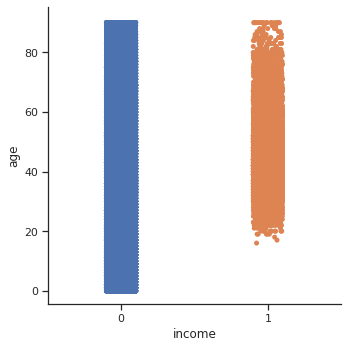

In [19]:
%matplotlib inline
sns.set(style="ticks")
sns.catplot(x="income", y="age", data=us_census_train)


#### Education, Age and Income

In [20]:
fig = px.scatter(us_census_train, x="age", y="education", color="income",
                 title="Education / Age, colored by income class",
                 labels={"age":"Age"})
fig.show()

**Comment**
The plot confirms a few intuitions: We see more people in the income class 50.000+ where eduaction is higher: Especially individuals holding a professor, master or doctorate degree have a higher probability of belonging to the higher income class. A low level of education is associated with a low probability of belonging to the high income class.

Not suprisingly we also see that education class children is the same variable as age < 18.

In fact we see that:

In [0]:
all_phds = us_census_train[us_census_train.education == ' Doctorate degree(PhD EdD)']
rich_phds = all_phds[all_phds.income == 1]
print("Doctorate degree holders with an income > 50.000 is ",len(rich_phds)/len(all_phds)*100,"%")

all_master_prof_doctor = us_census_train[(us_census_train.education == ' Doctorate degree(PhD EdD)') | (us_census_train.education == "Masters degree(MA MS MEng MEd MSW MBA)")|(us_census_train.education == " Prof school degree (MD DDS DVM LLB JD)" ) ]
rich_master_prof_doctor = all_master_prof_doctor[all_master_prof_doctor.income == 1]
print("Doctorate degree holders, Professor, Masters with an income > 50.000 is ",len(rich_master_prof_doctor)/len(all_master_prof_doctor)*100,"%")

#### Capital Gains, Age and Income

In [0]:
fig = px.scatter(us_census_train, x="age", y="capital_gains", color="income",
                 title="Capital gains / Age, colored by income class",
                 labels={"age":"Age"}
                )
fig.show()

#### Occupation, Age and Income

In [0]:
fig = px.scatter(us_census_train, x="age", y="detailed_occupation_recode", color="income",
                 title="detailed_occupation_recode / age, colored by income class",
                 labels={"age":"Age"}
                )
fig.show()

#### Wage per Hour, Occupation, Income

In [0]:
fig = px.box(us_census_train, x="major_occupation_code",y="wage_per_hour", color="income",
                 title="major_occupation_code / wage per hour by income",
                 labels={"age":"Age"}
                )
fig.show()

**Comments**
The plot shows that mean wage per hour and the spread of wages differs between occupations. 
In the data set we have furthermore no indvidual that is working in private household services and belongs to the higher income class.   
Interestingly, we see high hourly wages at the extreme end of the distribution for individuals not belonging to the high income class. This might be not suprising however, as we have  Probability for the label '- 50000' of 93.80%, thus much more observations in this category (and hence should expect to see more extreme values by chance). 

#### Industry, Wage, Income

In [0]:
fig = px.scatter(us_census_train, x="detailed_industry_recode",y="wage_per_hour", color="income",
                 title="detailed_industry_recode / age by income",
                 labels={"age":"Age"}
                )
fig.show()


# 3. Clean, preprocess, and engineer features in the training data

## Cleaning
### Dropping Duplicates

In [21]:
#DROP DUPLICATES
us_census_train_without_duplicates = us_census_train.drop_duplicates()
print("Dropped",(len(us_census_train) - len(us_census_train_without_duplicates)),"duplicates in training data ")

us_census_test_without_duplicates = us_census_test.drop_duplicates()
print("Dropped",(len(us_census_test) - len(us_census_test_without_duplicates)),"duplicates in testing data ")

#use from now on only data without duplicates
us_census_train = us_census_train_without_duplicates
us_census_test = us_census_test_without_duplicates

Dropped 3229 duplicates in training data 
Dropped 883 duplicates in testing data 


### Missing Values and Variable Encoding
We have missing values for many variables, encoded differently - sometimes with "0", sometimes with "not in universe" (NIU) description. We don't know if values are missing at random, especially the "NIU" ones could be missing not at random or just signify category other. 

*Assumption*: "?" are missing values, not in universe means none of the other categories apply.


We need to handle missing values depending on the chosen algorithm. I will therefore create different preprocessed inputs.


**A) Penalized Logistic Regression**

*Dataset X_a*: All features, mode imputation on missing values. 

*Dataset X_b*: Hand selected limited number of features, mode imputation on missing values. 


As a good baseline I also want to evaluate the performance of a logistic regression. For this I will impute missing data with the mode. 

**B) Random Forest Classifier**

*Dataset* X_c: All features, missing values untreated.  

Since we have a mix of categorical and numerical input features, using an ensemble of weak predictors could be successful. I want to evaluate a random forest. I want to try this method *without* imputing missing data before, as a random forests can handle missing values through repeated subsampling of features and datasets "by themselves".  


**Comment on Principcal Component Analysis:**
I considered a principal component analysis to preprocess the data with the goal of reducing dimensionality and handling missing values. I would have then used the first x < 41 dimensions as input features for a classifier.

I evaluated this option (see below), but found that the first 10 principal components of the dataset only expain 54% of the dataset's variance. 

Since we are looking for an explainable model and already get a prediction accuracy > 94% using only 9 (non-synthetic!) variables, I am not building any classifier using principal components as input features. 


## X_a


In [0]:
# ## Creation of data set X_a: mode-imputation of missing values, all features
us_census_train_imputed = us_census_train
us_census_test_imputed = us_census_test

for col in ['region_of_previous_residence', 'migration_code-change_in_msa', 'migration_code-change_in_reg',"migration_code-move_within_reg","migration_prev_res_in_sunbelt","country_of_birth_father","country_of_birth_mother","country_of_birth_self"]:
    us_census_train_imputed[col].fillna(us_census_train_imputed[col].mode()[0], inplace=True)
    us_census_test_imputed[col].fillna(us_census_test_imputed[col].mode()[0], inplace=True)


In [23]:
print("Missing Values in us_census_train",us_census_train.isnull().sum())
print("Missing Values in us_census_test",us_census_test.isnull().sum())
print("##############################'")
print("Missing Values in us_census_train_imputed",us_census_train_imputed.isnull().sum())
print("Missing Values in us_census_test_imputed",us_census_test_imputed.isnull().sum())

Missing Values in us_census_train age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in__edu_inst_last_wk                   0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part_time_employment_stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
federal_income_tax_liability                  0
tax_fi

In [63]:
## Creation of data set X_a: mode-imputation of missing values, all features

X_a = us_census_train_imputed.drop(['income'], axis=1)
y_a = us_census_train_imputed['income']

##Split data into separate training and test set
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size = 0.3, random_state = 1)

numeric = X_a._get_numeric_data().columns
categorical = X_a.select_dtypes(include=['object','category']).columns

#####Encode categorical variables
#get all columns for numeric and non-numeric data

for feature in categorical:
      le = preprocessing.LabelEncoder()
      X_a_train[feature] = le.fit_transform(X_a_train[feature])
      X_a_test[feature] = le.transform(X_a_test[feature])

#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_a_train = pd.DataFrame(scaler.fit_transform(X_a_train), columns = X_a.columns)

X_a_test = pd.DataFrame(scaler.transform(X_a_test), columns = X_a.columns)
X_a_train.head()

age  class_of_worker  detailed_industry_recode  \
0 -0.896401        -0.444150                 -0.861091   
1  2.297147        -0.444150                 -0.861091   
2 -0.086769        -2.242198                  1.513294   
3  1.667433        -0.444150                 -0.861091   
4 -0.806442         0.454874                  0.961112   

   detailed_occupation_recode  education  wage_per_hour  \
0                   -0.792938  -0.974392      -0.203223   
1                   -0.792938   0.953042      -0.203223   
2                   -0.103087  -0.251604      -0.203223   
3                   -0.792938   0.471184      -0.203223   
4                    1.207629  -0.974392      -0.203223   

   enroll_in__edu_inst_last_wk  marital_stat  major_industry_code  \
0                     0.245897      0.714115             0.211552   
1                     0.245897      0.714115             0.211552   
2                     0.245897     -0.701097            -1.657803   
3                     0.245897     -0.701097             0.211552   
4                    -2.410350      0.714115             1.250082   

   major_occupation_code      race  hispanic_origin       sex  \
0              -0.099358  0.414681        -0.364755  1.045006   
1              -0.099358  0.414681        -0.364755 -0.956932   
2               1.177509  0.414681        -0.364755 -0.956932   
3              -0.099358  0.414681        -0.364755 -0.956932   
4               0.219859  0.414681        -0.364755 -0.956932   

   member_of_a_labor_union  reason_for_unemployment  \
0                 0.219322                -0.030242   
1                 0.219322                -0.030242   
2                 0.219322                -0.030242   
3                 0.219322                -0.030242   
4                 0.219322                 6.256276   

   full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                           1.083847      -0.093883       -0.137311   
1                          -0.579936      -0.093883       -0.137311   
2                          -0.579936      -0.093883       -0.137311   
3                          -0.579936      -0.093883       -0.137311   
4                           5.243304      -0.093883       -0.137311   

   dividends_from_stocks  federal_income_tax_liability  tax_filer_stat  \
0              -0.101246                      0.570340       -0.018141   
1              -0.101246                      1.287992       -0.018141   
2              -0.101246                     -0.864963       -0.018141   
3              -0.101246                      0.570340       -0.018141   
4              -0.101246                      0.570340       -0.018141   

   region_of_previous_residence  state_of_previous_residence  \
0                      0.176061                    -1.072996   
1                      0.176061                     0.153305   
2                      0.176061                     1.467199   
3                      0.176061                     1.467199   
4                      0.176061                    -1.072996   

   detailed_household_and_family_stat  \
0                           -0.964606   
1                            0.001431   
2                            1.450486   
3                            1.450486   
4                           -0.964606   

   detailed_household_summary_in_household  migration_code-change_in_msa  \
0                                -0.666890                       0.24768   
1                                 0.046244                       0.24768   
2                                -1.441607                       0.24768   
3                                 0.379252                       0.24768   
4                                -0.775059                       0.24768   

   migration_code-change_in_reg  migration_code-move_within_reg  \
0                     -0.017523                        0.012704   
1                     -0.017523                        0.012704   
2    

## X_b
Human feature selection based on intuition (by me)

In [0]:
# drop detailed_industry_recode, only keep major_industry_code 
# drop detailed_occupation_recode, only keep major_occupation_code 
# drop the year - this should not carry relevant information 

# region_of_previous_residence is highly correlated with tax_filer_stat - to me it is hard to understand why. 
# after looking at the metadata, I decide to top  tax_filer_stat - this information should be largely contained in detailed household and family stat

X_b = us_census_train_imputed.drop(['income','detailed_industry_recode','detailed_occupation_recode','year',"tax_filer_stat"], axis=1)
y_b = us_census_train_imputed['income']


In [64]:
##Split data into separate training and test set
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size = 0.3, random_state = 1)

numeric = X_b._get_numeric_data().columns
categorical = X_b.select_dtypes(include=['object','category']).columns

#####Encode categorical variables
#get all columns for numeric and non-numeric data

for feature in categorical:
      le = preprocessing.LabelEncoder()
      X_b_train[feature] = le.fit_transform(X_b_train[feature])
      X_b_test[feature] = le.transform(X_b_test[feature])

#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_b_train = pd.DataFrame(scaler.fit_transform(X_b_train), columns = X_b.columns)

X_b_test = pd.DataFrame(scaler.transform(X_b_test), columns = X_b.columns)
X_b_train.head()

age  class_of_worker  education  wage_per_hour  \
0 -0.896401        -0.444150  -0.974392      -0.203223   
1  2.297147        -0.444150   0.953042      -0.203223   
2 -0.086769        -2.242198  -0.251604      -0.203223   
3  1.667433        -0.444150   0.471184      -0.203223   
4 -0.806442         0.454874  -0.974392      -0.203223   

   enroll_in__edu_inst_last_wk  marital_stat  major_industry_code  \
0                     0.245897      0.714115             0.211552   
1                     0.245897      0.714115             0.211552   
2                     0.245897     -0.701097            -1.657803   
3                     0.245897     -0.701097             0.211552   
4                    -2.410350      0.714115             1.250082   

   major_occupation_code      race  hispanic_origin       sex  \
0              -0.099358  0.414681        -0.364755  1.045006   
1              -0.099358  0.414681        -0.364755 -0.956932   
2               1.177509  0.414681        -0.364755 -0.956932   
3              -0.099358  0.414681        -0.364755 -0.956932   
4               0.219859  0.414681        -0.364755 -0.956932   

   member_of_a_labor_union  reason_for_unemployment  \
0                 0.219322                -0.030242   
1                 0.219322                -0.030242   
2                 0.219322                -0.030242   
3                 0.219322                -0.030242   
4                 0.219322                 6.256276   

   full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                           1.083847      -0.093883       -0.137311   
1                          -0.579936      -0.093883       -0.137311   
2                          -0.579936      -0.093883       -0.137311   
3                          -0.579936      -0.093883       -0.137311   
4                           5.243304      -0.093883       -0.137311   

   dividends_from_stocks  federal_income_tax_liability  \
0              -0.101246                      0.570340   
1              -0.101246                      1.287992   
2              -0.101246                     -0.864963   
3              -0.101246                      0.570340   
4              -0.101246                      0.570340   

   region_of_previous_residence  state_of_previous_residence  \
0                      0.176061                    -1.072996   
1                      0.176061                     0.153305   
2                      0.176061                     1.467199   
3                      0.176061                     1.467199   
4                      0.176061                    -1.072996   

   detailed_household_and_family_stat  \
0                           -0.964606   
1                            0.001431   
2                            1.450486   
3                            1.450486   
4                           -0.964606   

   detailed_household_summary_in_household  migration_code-change_in_msa  \
0                                -0.666890                       0.24768   
1                                 0.046244                       0.24768   
2                                -1.441607                       0.24768   
3                                 0.379252                       0.24768   
4                                -0.775059                       0.24768   

   migration_code-change_in_reg  migration_code-move_within_reg  \
0                     -0.017523                        0.012704   
1                     -0.017523                        0.012704   
2                     -0.017523                        0.012704   
3                     -0.017523                        0.012704   
4                     -0.017523                        0.012704   

   live_in_this_house_1_year_ago  migration_prev_res_in_sunbelt  \
0                      -0.541136                       0.077401   
1                       1.077242                       0.077401   
2                       1.077242                     

### X_b.2 
Super Hand Picked - 9 features based on highest correlation with target variable income based on phi-k correlation-coefficient.  

+ detailed_occupation_recode      
+ capital_gains                   
+ education                       
+ major_occupation_code          
+ detailed_industry_recode        
+ weeks_worked_in_year           
+ major_industry_code             
+ federal_income_tax_liability    
+ age                            




In [0]:
# drop detailed_industry_recode, only keep major_industry_code 
# drop detailed_occupation_recode, only keep major_occupation_code 
# drop the year - this should not carry relevant information 

# region_of_previous_residence is highly correlated with tax_filer_stat - to me it is hard to understand why. 
# after looking at the metadata, I decide to top  tax_filer_stat - this information should be largely contained in detailed household and family stat

X_b_2 = us_census_train_imputed[["age","education","detailed_occupation_recode","capital_gains","detailed_industry_recode","weeks_worked_in_year","federal_income_tax_liability"]]
y_b_2 = us_census_train_imputed['income']


In [28]:
##Split data into separate training and test set
X_b_2_train, X_b_2_test, y_b_2_train, y_b_2_test = train_test_split(X_b_2, y_b_2, test_size = 0.3, random_state = 1)

numeric = X_b_2._get_numeric_data().columns
categorical = X_b_2.select_dtypes(include=['object','category']).columns

#####Encode categorical variables
#get all columns for numeric and non-numeric data

for feature in categorical:
      le = preprocessing.LabelEncoder()
      X_b_2_train[feature] = le.fit_transform(X_b_2_train[feature])
      X_b_2_test[feature] = le.transform(X_b_2_test[feature])

#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_b_2_train = pd.DataFrame(scaler.fit_transform(X_b_2_train), columns = X_b_2.columns)

X_b_2_test = pd.DataFrame(scaler.transform(X_b_2_test), columns = X_b_2.columns)
X_b_2_train.head()

age  education  detailed_occupation_recode  capital_gains  \
0 -0.896401  -0.974392                   -0.792938      -0.093883   
1  2.297147   0.953042                   -0.792938      -0.093883   
2 -0.086769  -0.251604                   -0.103087      -0.093883   
3  1.667433   0.471184                   -0.792938      -0.093883   
4 -0.806442  -0.974392                    1.207629      -0.093883   

   detailed_industry_recode  weeks_worked_in_year  \
0                 -0.861091             -0.963078   
1                 -0.861091             -0.963078   
2                  1.513294              1.166363   
3                 -0.861091             -0.963078   
4                  0.961112             -0.963078   

   federal_income_tax_liability  
0                      0.570340  
1                      1.287992  
2                     -0.864963  
3                      0.570340  
4                      0.570340

## X_c  
all features, no treatment of missing values
(we could even go so far to say that "not in universe" is a missing value)

In [65]:
X_c = us_census_train.drop(['income'], axis=1)
y_c = us_census_train['income']

##Split data into separate training and test set
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size = 0.3, random_state = 1)

numeric = X_c._get_numeric_data().columns
categorical = X_c.select_dtypes(include=['object','category']).columns

#####Encode categorical variables
for feature in categorical:
      le = preprocessing.LabelEncoder()
      X_c_train[feature] = le.fit_transform(X_c_train[feature])
      X_c_test[feature] = le.transform(X_c_test[feature])

#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_c_train = pd.DataFrame(scaler.fit_transform(X_a_train), columns = X_c.columns)
X_c_test = pd.DataFrame(scaler.transform(X_c_test), columns = X_c.columns)
X_c_train.head()

age  class_of_worker  detailed_industry_recode  \
0 -0.896401        -0.444150                 -0.861091   
1  2.297147        -0.444150                 -0.861091   
2 -0.086769        -2.242198                  1.513294   
3  1.667433        -0.444150                 -0.861091   
4 -0.806442         0.454874                  0.961112   

   detailed_occupation_recode  education  wage_per_hour  \
0                   -0.792938  -0.974392      -0.203223   
1                   -0.792938   0.953042      -0.203223   
2                   -0.103087  -0.251604      -0.203223   
3                   -0.792938   0.471184      -0.203223   
4                    1.207629  -0.974392      -0.203223   

   enroll_in__edu_inst_last_wk  marital_stat  major_industry_code  \
0                     0.245897      0.714115             0.211552   
1                     0.245897      0.714115             0.211552   
2                     0.245897     -0.701097            -1.657803   
3                     0.245897     -0.701097             0.211552   
4                    -2.410350      0.714115             1.250082   

   major_occupation_code      race  hispanic_origin       sex  \
0              -0.099358  0.414681        -0.364755  1.045006   
1              -0.099358  0.414681        -0.364755 -0.956932   
2               1.177509  0.414681        -0.364755 -0.956932   
3              -0.099358  0.414681        -0.364755 -0.956932   
4               0.219859  0.414681        -0.364755 -0.956932   

   member_of_a_labor_union  reason_for_unemployment  \
0                 0.219322                -0.030242   
1                 0.219322                -0.030242   
2                 0.219322                -0.030242   
3                 0.219322                -0.030242   
4                 0.219322                 6.256276   

   full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                           1.083847      -0.093883       -0.137311   
1                          -0.579936      -0.093883       -0.137311   
2                          -0.579936      -0.093883       -0.137311   
3                          -0.579936      -0.093883       -0.137311   
4                           5.243304      -0.093883       -0.137311   

   dividends_from_stocks  federal_income_tax_liability  tax_filer_stat  \
0              -0.101246                      0.570340       -0.018141   
1              -0.101246                      1.287992       -0.018141   
2              -0.101246                     -0.864963       -0.018141   
3              -0.101246                      0.570340       -0.018141   
4              -0.101246                      0.570340       -0.018141   

   region_of_previous_residence  state_of_previous_residence  \
0                      0.176061                    -1.072996   
1                      0.176061                     0.153305   
2                      0.176061                     1.467199   
3                      0.176061                     1.467199   
4                      0.176061                    -1.072996   

   detailed_household_and_family_stat  \
0                           -0.964606   
1                            0.001431   
2                            1.450486   
3                            1.450486   
4                           -0.964606   

   detailed_household_summary_in_household  migration_code-change_in_msa  \
0                                -0.666890                       0.24768   
1                                 0.046244                       0.24768   
2                                -1.441607                       0.24768   
3                                 0.379252                       0.24768   
4                                -0.775059                       0.24768   

   migration_code-change_in_reg  migration_code-move_within_reg  \
0                     -0.017523                        0.012704   
1                     -0.017523                        0.012704   
2    

## PCA

In [69]:
# Lets see if first 10 components of PCA are better then picking 9 "most phi correlated" variables by hand
pca = PCA(n_components=10, svd_solver='full')
pca.fit(X_c_train)
PCA(n_components=10, svd_solver='full')
print(pca.explained_variance_ratio_)
print("Total variance explained with first 10 principal components",sum(pca.explained_variance_ratio_*100),"%")

[0.13616581 0.07705128 0.06033263 0.05394396 0.04845825 0.04650392
 0.03426303 0.03222294 0.03139847 0.02866483]
Total variance explained with first 10 principal components 54.900512637763796 %


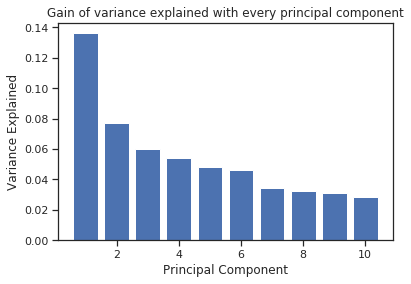

In [70]:
plt.bar(np.arange(1,11), pca.explained_variance_ratio_, width=0.8)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Gain of variance explained with every principal component")
plt.show()

*Comment*: I will not use the PC as inputs for a classifier as explained before. 

# 4. Predictive Model

Create a model using these features to predict whether a person earns more or less than $50,000 per year. Here, the idea is for you to test a few different models, and see whether there are any techniques you can apply to improve performance over your first results.

In [0]:
results= pd.DataFrame( {'Name':[],'Accuracy':[],"AUC":[],"Calculation_Time":[]})

### Logistic Regression
X_a: All features, mean-imputed

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(penalty='none',random_state=42, C=1.0)
logreg.fit(X_a_train, y_a_train)
y_a_pred_logreg = logreg.predict(X_a_test)

print('Logistic Regression accuracy score with all the features and no penalty: {0:0.4f}'. format(accuracy_score(y_a_test, y_a_pred_logreg)))

# Penalised (we should fine tune C if the algorithm performs well)
logreg_penalized = LogisticRegression(penalty='l2',random_state=42, C=0.5)
logreg_penalized.fit(X_a_train, y_a_train)
y_a_pred_logreg_penalized = logreg_penalized.predict(X_a_test)

print('Logistic Regression accuracy score with all the features and,l2 penalty and C=0.5 regularization: {0:0.4f}'. format(accuracy_score(y_a_test, y_a_pred_logreg_penalized)))


Logistic Regression accuracy score with all the features and no penalty: 0.9472
Logistic Regression accuracy score with all the features and,l2 penalty and C=0.5 regularization: 0.9472


X_b: Hand selected features, mean-imputed

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(penalty='none',random_state=42, C=1.0)
logreg.fit(X_b_train, y_b_train)
y_b_pred_logreg = logreg.predict(X_b_test)

print('Logistic Regression accuracy score with all the features and no penalty: {0:0.4f}'. format(accuracy_score(y_b_test, y_b_pred_logreg)))

Logistic Regression accuracy score with all the features and no penalty: 0.9454


X_b_2 Super Hand selected, mean imputed

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(penalty='none',random_state=42, C=1.0)
logreg.fit(X_b_2_train, y_b_2_train)
y_b_2_pred_logreg = logreg.predict(X_b_2_test)

print('Logistic Regression accuracy score with all the features and no penalty: {0:0.4f}'. format(accuracy_score(y_b_2_test, y_b_2_pred_logreg)))


Logistic Regression accuracy score with all the features and no penalty: 0.9424


In [42]:
print("coefficients and their weights")
coefs =  [item for items in logreg.coef_ for item in items]
for coef, colname in zip(coefs,X_b_2.columns):
  print('{0:0.4f}'. format(coef),colname)

coefficients and their weights
0.8167 age
0.1678 education
-0.8177 detailed_occupation_recode
0.7466 capital_gains
-0.0584 detailed_industry_recode
1.9844 weeks_worked_in_year
-0.1745 federal_income_tax_liability


**Comment** This is really interesting. We lose very little in accuracy (0.3%), but we reduce the model to only 7 input features (from 41).

### Random Forest
#### X_c: including missing values

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

ESTIMATORS = 500

#Create a Gaussian Classifier
randomforest=RandomForestClassifier(n_estimators=ESTIMATORS)

randomforest.fit(X_c_train,y_c_train)

y_c_pred=randomforest.predict(X_c_test)
print("Random forest accuracy score with all the features using",ESTIMATORS," estimators: {0:0.4f}'",accuracy_score(y_c_test, y_c_pred))


Random forest accuracy score with all the features using 500  estimators: {0:0.4f}' 0.920766187233609


In [52]:
ESTIMATORS = 1000

#Create a Gaussian Classifier
randomforest=RandomForestClassifier(n_estimators=ESTIMATORS)

randomforest.fit(X_c_train,y_c_train)

y_c_pred=randomforest.predict(X_c_test)
print("Random forest accuracy score with all the features using",ESTIMATORS," estimators: {0:0.4f}'",accuracy_score(y_c_test, y_c_pred))


Random forest accuracy score with all the features using 1000  estimators: {0:0.4f}' 0.9177944947273684


(137405, 41)

#### GridSearching the right parameters for random forest 

In [55]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on "rules of thumb":
# depth : our training data has ca. 140.000 individuals
# subset - size : use a proportion of 1/√p = 6  

if run_everything:
  param_grid = {
    'n_estimators': [100, 200, 300, 400,500,600],
    "max_features" : [5,6,7,8]
}
  # Create a based model
  rf = RandomForestClassifier()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


  # fit
  grid_search.fit(X_c_train,y_c_train)
  grid_search.best_params_


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 49.8min finished


{'max_features': 7, 'n_estimators': 600}

In [62]:
#Use parameters for grid search

randomforest = RandomForestClassifier(n_estimators=600,max_features= 7)

randomforest.fit(X_c_train,y_c_train)

y_c_pred=randomforest.predict(X_c_test)
print("Random forest accuracy score with all the features using 600 estimators with max 7 features: {0:0.4f}",accuracy_score(y_c_test, y_c_pred))


Random forest accuracy score with all the features using 600 estimators with max 7 features: {0:0.4f} 0.9143812936202007




## 5) Choose best model 
Chose the model that appears to have the highest performance based on a comparison between reality (the 42nd variable) and the model’s prediction.


## Challenging Areas

- meaningful visualisations for 42 dimensions
- decision on how to deal with missing values 


to dos in the end: 
create profile report from jupyter interface

we could do graphs comparing model performance, complexity and training time

### Preprocessing
https://www.kaggle.com/prashant111/eda-logistic-regression-pca